# 1.0 Loading Model Libraries...

In [55]:
%%time
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parquet-files-amexdefault-prediction/test_data.parquet
/kaggle/input/parquet-files-amexdefault-prediction/train_data.ftr
/kaggle/input/parquet-files-amexdefault-prediction/train_data.parquet
/kaggle/input/parquet-files-amexdefault-prediction/test_data.ftr
/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv
CPU times: user 425 µs, sys: 2.91 ms, total: 3.34 ms
Wall time: 11.3 ms


In [56]:
%%time
import datetime # ...

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 12.6 µs


---

# 2.0 Setting the Notebook Parameters and Default Configuration...

In [57]:
%%time
# I like to disable my Notebook Warnings.
import warnings
warnings.filterwarnings('ignore')

CPU times: user 39 µs, sys: 3 µs, total: 42 µs
Wall time: 47.2 µs


In [58]:
%%time
# Notebook Configuration...

# Amount of data we want to load into the Model...
DATA_ROWS = None
# Dataframe, the amount of rows and cols to visualize...
NROWS = 50
NCOLS = 15
# Main data location path...
BASE_PATH = '...'

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.68 µs


In [59]:
%%time
# Configure notebook display settings to only use 2 decimal places, tables look nicer.
pd.options.display.float_format = '{:,.5f}'.format
pd.set_option('display.max_columns', NCOLS) 
pd.set_option('display.max_rows', NROWS)

CPU times: user 88 µs, sys: 7 µs, total: 95 µs
Wall time: 98.5 µs


---

# 3.0 Loading the Dataset Information (Using Feather)...

In [60]:
%%time
# Load the CSV information into a Pandas DataFrame...
trn_data = pd.read_feather('../input/parquet-files-amexdefault-prediction/train_data.ftr')
trn_lbls = pd.read_csv('/kaggle/input/amex-default-prediction/train_labels.csv').set_index('customer_ID')

tst_data = pd.read_feather('../input/parquet-files-amexdefault-prediction/test_data.ftr')

KeyboardInterrupt: 

In [61]:
%%time
sub = pd.read_csv('/kaggle/input/amex-default-prediction/sample_submission.csv')

CPU times: user 797 ms, sys: 417 ms, total: 1.21 s
Wall time: 1.61 s


---

# 4.0 Exploring the Dataset, Quick EDA...

In [62]:
%%time
# Explore the shape of the DataFrame...
trn_data.shape

NameError: name 'trn_data' is not defined

In [63]:
%%time
# Display simple information of the variables in the dataset...
trn_data.info()

NameError: name 'trn_data' is not defined

In [64]:
%%time
# Display the first few rows of the DataFrame...
trn_data.head()

NameError: name 'trn_data' is not defined

In [65]:
%%time
# Display the Min Date...
trn_data['S_2'].min()

NameError: name 'trn_data' is not defined

In [66]:
%%time
# Display the Max Date...
trn_data['S_2'].max()

NameError: name 'trn_data' is not defined

In [67]:
%%time
# Generate a simple statistical summary of the DataFrame, Only Numerical...
trn_data.describe()

NameError: name 'trn_data' is not defined

In [68]:
%%time
# Calculates the total number of missing values...
trn_data.isnull().sum().sum()

NameError: name 'trn_data' is not defined

In [69]:
%%time
# Display the number of missing values by variable...
trn_data.isnull().sum()

NameError: name 'trn_data' is not defined

In [70]:
%%time
# Display the number of unique values for each variable...
trn_data.nunique()

NameError: name 'trn_data' is not defined

In [71]:
%%time
# Display the number of unique values for each variable, sorted by quantity...
trn_data.nunique().sort_values(ascending = True)

NameError: name 'trn_data' is not defined

---

# 5.0 Understanding the Target Variable...

In [72]:
%%time
# Explore the shape of the DataFrame...
trn_lbls.shape

CPU times: user 17 µs, sys: 1e+03 ns, total: 18 µs
Wall time: 22.6 µs


(458913, 1)

In [73]:
%%time
# Display simple information of the variables in the dataset...
trn_lbls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458913 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   target  458913 non-null  int64
dtypes: int64(1)
memory usage: 7.0+ MB
CPU times: user 7.38 ms, sys: 0 ns, total: 7.38 ms
Wall time: 7.62 ms


In [74]:
%%time
# Check how well balanced is the dataset
trn_lbls['target'].value_counts()

CPU times: user 3.65 ms, sys: 980 µs, total: 4.63 ms
Wall time: 4.39 ms


0    340085
1    118828
Name: target, dtype: int64

In [75]:
%%time
# Check some statistics on the target variable
trn_lbls['target'].describe()

CPU times: user 12.4 ms, sys: 107 µs, total: 12.5 ms
Wall time: 13.2 ms


count   458,913.00000
mean          0.25893
std           0.43805
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max           1.00000
Name: target, dtype: float64

---

# 6.0 Structuring Data for the Model (Aggreations and More)

## 6.1 Training Dataset...

In [76]:
%%time
# We have 458913 customers. and we have 458913 train labels...

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 14.1 µs


In [77]:
%%time
# Calculates the amount of information by costumer or records available...
trn_num_statements = trn_data.groupby('customer_ID').size().sort_index()

NameError: name 'trn_data' is not defined

In [78]:
%%time
# Review some of the information created...
trn_num_statements

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


customer_ID
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    13
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5    13
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1    13
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc    13
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed    13
                                                                    ..
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7    13
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286    13
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6    13
ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145b2c3d01967fcce461    13
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681    13
Length: 458913, dtype: int64

In [79]:
%%time
# Create a new dataset based on aggregated information
trn_agg_data = (trn_data
                .groupby('customer_ID')
                .tail(1)
                .set_index('customer_ID', drop=True)
                .sort_index()
                .drop(['S_2'], axis='columns'))

# Merge the labels from the labels dataframe
trn_agg_data['target'] = trn_lbls.target
trn_agg_data['num_statements'] = trn_num_statements

trn_agg_data.reset_index(inplace = True, drop = True) # forget the customer_IDs

NameError: name 'trn_data' is not defined

In [80]:
%%time
trn_agg_data.head()

CPU times: user 67 µs, sys: 6 µs, total: 73 µs
Wall time: 76.3 µs


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,4,5,6,7,8,9,10
0,0.93457,0.00912,0.00938,1.00781,0.00610,0.13501,0.00160,...,4.00000,0.00000,1.00000,2.00000,0.00000,0.00000,5.00000
1,0.88037,0.17810,0.03470,1.00391,0.00691,0.16553,0.00555,...,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,5.00000
2,0.88086,0.00970,0.00428,0.81250,0.00645,0.00000,0.00380,...,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,5.00000
3,0.62158,0.00108,0.01257,1.00586,0.00783,0.28784,0.00453,...,6.00000,0.00000,1.00000,1.00000,0.00000,0.00000,2.00000
4,0.87207,0.00557,0.00768,0.81592,0.00125,0.00000,0.00023,...,4.00000,0.00000,1.00000,1.00000,0.00000,0.00000,5.00000


---

## 6.2 Test Dataset...

In [81]:
%%time
# Calculates the amount of information by costumer or records available...
tst_num_statements = tst_data.groupby('customer_ID').size().sort_index()

NameError: name 'tst_data' is not defined

In [82]:
%%time
# Create a new dataset based on aggregated information
tst_agg_data = (tst_data
                .groupby('customer_ID')
                .tail(1)
                .set_index('customer_ID', drop=True)
                .sort_index()
                .drop(['S_2'], axis='columns'))

# Merge the labels from the labels dataframe
tst_agg_data['num_statements'] = tst_num_statements

tst_agg_data.reset_index(inplace = True, drop = True) # forget the customer_IDs

NameError: name 'tst_data' is not defined

In [83]:
%%time
tst_agg_data.head()

CPU times: user 99 µs, sys: 0 ns, total: 99 µs
Wall time: 110 µs


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,4,5,6,7,8,9,10
0,0.56885,0.12140,0.01078,1.00977,0.00692,0.14941,0.00040,...,0.00000,1.00000,0.00000,2.00000,2.00000,0.00000,5.00000
1,0.84131,0.12646,0.01656,1.00879,0.00971,0.11218,0.00619,...,3.00000,0.00000,1.00000,1.00000,0.00000,0.00000,5.00000
2,0.69775,0.00272,0.00148,0.81006,0.00262,0.16614,0.00489,...,3.00000,0.00000,0.00000,2.00000,2.00000,0.00000,3.00000
3,0.51318,0.32471,0.14954,0.20569,0.00228,0.18115,0.00581,...,4.00000,0.00000,1.00000,0.00000,1.00000,0.00000,4.00000
4,0.25439,0.76807,0.56348,0.03802,0.50293,0.16833,0.00948,...,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,4.00000


---

# 7.0 Label / One-Hot Encoding the Categorical Variables...

## 7.1 One Hot Encoding Configuration...

In [84]:
%%time
from sklearn.preprocessing import StandardScaler, QuantileTransformer, OneHotEncoder, OrdinalEncoder

CPU times: user 12 µs, sys: 1 µs, total: 13 µs
Wall time: 16.5 µs


In [85]:
%%time
# One-hot Encoding Configuration
cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

#trn_agg_data[cat_features] = trn_agg_data[cat_features].astype(object)
trn_not_cat_features = [f for f in trn_agg_data.columns if f not in cat_features]
tst_not_cat_features = [f for f in tst_agg_data.columns if f not in cat_features]

CPU times: user 123 µs, sys: 10 µs, total: 133 µs
Wall time: 136 µs


In [86]:
%%time
trn_agg_data[cat_features].head()

KeyError: "None of [Index(['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63',\n       'D_64', 'D_66', 'D_68'],\n      dtype='object')] are in the [columns]"

In [87]:
%%time
#encoder = OneHotEncoder(drop = 'first', sparse = False, dtype = np.float32, handle_unknown = 'ignore')
encoder = OrdinalEncoder()
trn_encoded_features = encoder.fit_transform(trn_agg_data[cat_features])
#feat_names = list(encoder.get_feature_names())

KeyError: "None of [Index(['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63',\n       'D_64', 'D_66', 'D_68'],\n      dtype='object')] are in the [columns]"

## 7.2 Train Dataset One Hot Encoding...

In [88]:
%%time
# One-hot Encoding
trn_encoded_features = pd.DataFrame(trn_encoded_features)
#trn_encoded_features.columns = feat_names

CPU times: user 21 µs, sys: 2 µs, total: 23 µs
Wall time: 27.4 µs


In [89]:
%%time
trn_agg_data = pd.concat([trn_agg_data[trn_not_cat_features], trn_encoded_features], axis = 1)
trn_agg_data.head(5)

CPU times: user 290 ms, sys: 348 ms, total: 638 ms
Wall time: 641 ms


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,4,5,6,7,8,9,10
0,0.93457,0.00912,0.00938,1.00781,0.00610,0.13501,0.00160,...,4.00000,0.00000,1.00000,2.00000,0.00000,NaN,5.00000
1,0.88037,0.17810,0.03470,1.00391,0.00691,0.16553,0.00555,...,0.00000,0.00000,1.00000,1.00000,0.00000,NaN,5.00000
2,0.88086,0.00970,0.00428,0.81250,0.00645,0.00000,0.00380,...,0.00000,0.00000,1.00000,1.00000,1.00000,NaN,5.00000
3,0.62158,0.00108,0.01257,1.00586,0.00783,0.28784,0.00453,...,6.00000,0.00000,1.00000,1.00000,0.00000,NaN,2.00000
4,0.87207,0.00557,0.00768,0.81592,0.00125,0.00000,0.00023,...,4.00000,0.00000,1.00000,1.00000,0.00000,0.00000,5.00000


---

## 7.3 Test Dataset One-Hot Encoding...

In [90]:
%%time
tst_agg_data[cat_features].head()

KeyError: "None of [Index(['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63',\n       'D_64', 'D_66', 'D_68'],\n      dtype='object')] are in the [columns]"

In [91]:
%%time
# One-hot Encoding
tst_encoded_features = encoder.transform(tst_agg_data[cat_features])
tst_encoded_features = pd.DataFrame(tst_encoded_features)
#tst_encoded_features.columns = feat_names

KeyError: "None of [Index(['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63',\n       'D_64', 'D_66', 'D_68'],\n      dtype='object')] are in the [columns]"

In [92]:
%%time
tst_agg_data = pd.concat([tst_agg_data[tst_not_cat_features], tst_encoded_features], axis = 1)
tst_agg_data.head()

CPU times: user 556 ms, sys: 753 ms, total: 1.31 s
Wall time: 1.32 s


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,4,5,6,7,8,9,10
0,0.56885,0.12140,0.01078,1.00977,0.00692,0.14941,0.00040,...,0.00000,1.00000,0.00000,2.00000,2.00000,NaN,5.00000
1,0.84131,0.12646,0.01656,1.00879,0.00971,0.11218,0.00619,...,3.00000,0.00000,1.00000,1.00000,0.00000,NaN,5.00000
2,0.69775,0.00272,0.00148,0.81006,0.00262,0.16614,0.00489,...,3.00000,0.00000,0.00000,2.00000,2.00000,0.00000,3.00000
3,0.51318,0.32471,0.14954,0.20569,0.00228,0.18115,0.00581,...,4.00000,0.00000,1.00000,0.00000,1.00000,NaN,4.00000
4,0.25439,0.76807,0.56348,0.03802,0.50293,0.16833,0.00948,...,0.00000,1.00000,0.00000,1.00000,1.00000,NaN,4.00000


---

# 8.0 Pre-Processing the Data, Fill NaNs for model functionality...

In [93]:
%%time
# Impute missing values
trn_agg_data.fillna(value = 0, inplace = True)
tst_agg_data.fillna(value = 0, inplace = True)

CPU times: user 945 ms, sys: 300 ms, total: 1.24 s
Wall time: 1.25 s


---

# 9.0 Feature Selection for Baseline Model...

In [94]:
%%time
features = [f for f in trn_agg_data.columns if f != 'target' and f != 'customer_ID']

CPU times: user 112 µs, sys: 0 ns, total: 112 µs
Wall time: 118 µs


---

# 10.0 NN Development

In [95]:
%%time
# Release some memory by deleting the original DataFrames...
import gc
del trn_data, tst_data
gc.collect()

NameError: name 'trn_data' is not defined

## 10.1 Loading Specific Model Libraries...

In [96]:
%%time
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping
from tensorflow.keras.layers import Dense, Input, InputLayer, Add, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.utils import plot_model
from sklearn.metrics import log_loss

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import random

CPU times: user 30 µs, sys: 3 µs, total: 33 µs
Wall time: 34.8 µs


---

## 10.2 Amex Metric, Function...

In [97]:
%%time
# From https://www.kaggle.com/code/inversion/amex-competition-metric-python

def amex_metric(y_true, y_pred, return_components=False) -> float:
    """Amex metric for ndarrays"""
    
    def top_four_percent_captured(df) -> float:
        """Corresponds to the recall for a threshold of 4 %"""
        
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
    
    
    def weighted_gini(df) -> float:
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    
    def normalized_weighted_gini(df) -> float:
        """Corresponds to 2 * AUC - 1"""
        
        df2 = pd.DataFrame({'target': df.target, 'prediction': df.target})
        df2.sort_values('prediction', ascending=False, inplace=True)
        return weighted_gini(df) / weighted_gini(df2)

    
    df = pd.DataFrame({'target': y_true.ravel(), 'prediction': y_pred.ravel()})
    df.sort_values('prediction', ascending=False, inplace=True)
    g = normalized_weighted_gini(df)
    d = top_four_percent_captured(df)

    if return_components: return g, d, 0.5 * (g + d)
    return 0.5 * (g + d)

CPU times: user 19 µs, sys: 0 ns, total: 19 µs
Wall time: 21.9 µs


---

## 10.3 Defining the NN Model Architecture...

## 10.3.1 Architecture 01, Simple NN

In [98]:
%%time
def nn_model():
    '''
    '''
    regularization = 4e-4
    activation_func = 'swish'
    inputs = Input(shape = (len(features)))
    
    x = Dense(256, 
              #use_bias  = True, 
              kernel_regularizer = tf.keras.regularizers.l2(regularization), 
              activation = activation_func)(inputs)
    
    x = BatchNormalization()(x)
    
    x = Dense(64, 
              #use_bias  = True, 
              kernel_regularizer = tf.keras.regularizers.l2(regularization), 
              activation = activation_func)(x)
    
    x = BatchNormalization()(x)
    
    x = Dense(64, 
          #use_bias  = True, 
          kernel_regularizer = tf.keras.regularizers.l2(regularization), 
          activation = activation_func)(x)
    
    x = BatchNormalization()(x)

    x = Dense(32, 
              #use_bias  = True, 
              kernel_regularizer = tf.keras.regularizers.l2(regularization), 
              activation = activation_func)(x)
    
    x = BatchNormalization()(x)

    x = Dense(1, 
              #use_bias  = True, 
              #kernel_regularizer = tf.keras.regularizers.l2(regularization),
              activation = 'sigmoid')(x)
    
    model = Model(inputs, x)
    
    return model

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


---

## 10.3.2 Architecture 02, Concatenated NN

In [99]:
%%time
def nn_model():
    regularization = 4e-4
    activation_func = 'swish'
    inputs = Input(shape = (len(features)))

    x0 = Dense(256,
               kernel_regularizer = tf.keras.regularizers.l2(regularization), 
               activation = activation_func)(inputs)
    x1 = Dense(128,
               kernel_regularizer = tf.keras.regularizers.l2(regularization),
               activation = activation_func)(x0)
    x1 = Dense(64,
               kernel_regularizer = tf.keras.regularizers.l2(regularization),
               activation = activation_func)(x1)
    x1 = Dense(32,
           kernel_regularizer = tf.keras.regularizers.l2(regularization),
           activation = activation_func)(x1)
    
    x1 = Concatenate()([x1, x0])
    x1 = Dropout(0.1)(x1)
    
    x1 = Dense(16, kernel_regularizer=tf.keras.regularizers.l2(regularization),activation=activation_func,)(x1)
    
    x1 = Dense(1, 
              #kernel_regularizer=tf.keras.regularizers.l2(regularization),
              activation='sigmoid')(x1)
    
    model = Model(inputs, x1)
    
    return model
    

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.11 µs


---

## 10.4 Visualizing the Model Structure...

In [100]:
%%time
architecture = nn_model()
architecture.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
dense_42 (Dense)                (None, 256)          51456       input_8[0][0]                    
__________________________________________________________________________________________________
dense_43 (Dense)                (None, 128)          32896       dense_42[0][0]                   
__________________________________________________________________________________________________
dense_44 (Dense)                (None, 64)           8256        dense_43[0][0]                   
____________________________________________________________________________________________

CPU times: user 60.9 ms, sys: 150 ms, total: 211 ms
Wall time: 518 ms


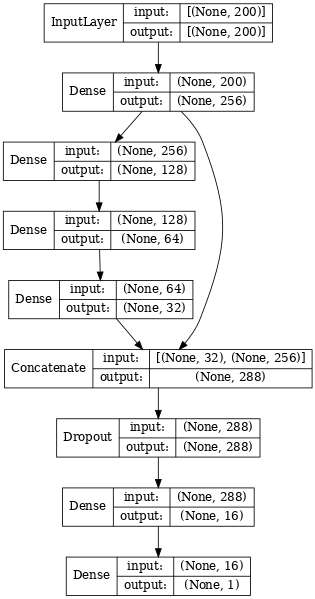

In [101]:
%%time
plot_model(nn_model(), show_layer_names = False, show_shapes = True, dpi = 60)

---

## 10.5 Defining Model Training Parameters...

In [102]:
%%time
# Defining model parameters...
BATCH_SIZE         = 2048
EPOCHS             = 192 
EPOCHS_COSINEDECAY = 192 
DIAGRAMS           = True
USE_PLATEAU        = False
INFERENCE          = False
VERBOSE            = 0 
TARGET             = 'target'

CPU times: user 0 ns, sys: 7 µs, total: 7 µs
Wall time: 11.2 µs


---

## 10.6 Defining the Model Training Configuration...

In [103]:
 %%time
# Defining model training function...
def fit_model(X_train, y_train, X_val, y_val, run = 0):
    '''
    '''
    lr_start = 0.01
    start_time = datetime.datetime.now()
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)

    epochs = EPOCHS    
    lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.7, patience = 4, verbose = VERBOSE)
    es = EarlyStopping(monitor = 'val_loss',patience = 12, verbose = 1, mode = 'min', restore_best_weights = True)
    tm = tf.keras.callbacks.TerminateOnNaN()
    callbacks = [lr, es, tm]
    
    # Cosine Learning Rate Decay
    if USE_PLATEAU == False:
        epochs = EPOCHS_COSINEDECAY
        lr_end = 0.0002

        def cosine_decay(epoch):
            if epochs > 1:
                w = (1 + math.cos(epoch / (epochs - 1) * math.pi)) / 2
            else:
                w = 1
            return w * lr_start + (1 - w) * lr_end
        
        lr = LearningRateScheduler(cosine_decay, verbose = 0)
        callbacks = [lr, tm]
    
    # Model Initialization...
    model = nn_model()
    optimizer_func = tf.keras.optimizers.Adam(learning_rate = lr_start)
    loss_func = tf.keras.losses.BinaryCrossentropy()
    model.compile(optimizer = optimizer_func, loss = loss_func)
    
    
    X_val = scaler.transform(X_val)
    validation_data = (X_val, y_val)
    
    history = model.fit(X_train, 
                        y_train, 
                        validation_data = validation_data, 
                        epochs          = epochs,
                        verbose         = VERBOSE,
                        batch_size      = BATCH_SIZE,
                        shuffle         = True,
                        callbacks       = callbacks
                       )
    
    history_list.append(history.history)
    
    print(f'Training Loss: {history_list[-1]["loss"][-1]:.5f}, Validation Loss: {history_list[-1]["val_loss"][-1]:.5f}')
    callbacks, es, lr, tm, history = None, None, None, None, None
    
    
    y_val_pred = model.predict(X_val, batch_size = BATCH_SIZE, verbose = VERBOSE).ravel()
    amex_score = amex_metric(y_val.values, y_val_pred, return_components = False)
    
    print(f'Fold {run}.{fold} | {str(datetime.datetime.now() - start_time)[-12:-7]}'
          f'| Amex Score: {amex_score:.5f}')
    
    print('')
    
    score_list.append(amex_score)
    
    tst_data_scaled = scaler.transform(tst_agg_data[features])
    tst_pred = model.predict(tst_data_scaled)
    predictions.append(tst_pred)
    
    return model

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 11.2 µs


---

## 10.7 Creating a Model Training Loop and Cross Validating in 5 Folds... 

In [104]:
%%time
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve
import math

# Create empty lists to store NN information...
history_list = []
score_list   = []
predictions  = []

# Define kfolds for training purposes...
kf = KFold(n_splits = 5)

for fold, (trn_idx, val_idx) in enumerate(kf.split(trn_agg_data)):
    X_train, X_val = trn_agg_data.iloc[trn_idx][features], trn_agg_data.iloc[val_idx][features]
    y_train, y_val = trn_agg_data.iloc[trn_idx][TARGET], trn_agg_data.iloc[val_idx][TARGET]
    
    fit_model(X_train, y_train, X_val, y_val)
    
print(f'OOF AUC: {np.mean(score_list):.5f}')

ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.7/site-packages/keras/engine/input_spec.py:269 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer model_9: expected shape=(None, 200), found shape=(None, 222)


---

# 11.0 Model Prediction and Submissions

In [105]:
%%time
sub.head()

CPU times: user 123 µs, sys: 10 µs, total: 133 µs
Wall time: 141 µs


,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0


In [106]:
%%time
sub['prediction'] = np.array(predictions).mean(axis = 0)

CPU times: user 1.01 ms, sys: 1.01 ms, total: 2.02 ms
Wall time: 2.09 ms


In [107]:
%%time
sub.to_csv('my_submission.csv', index = False)

CPU times: user 1.45 s, sys: 128 ms, total: 1.58 s
Wall time: 1.59 s


In [108]:
%%time
sub.head()

CPU times: user 139 µs, sys: 0 ns, total: 139 µs
Wall time: 146 µs


,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,NaN
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,NaN
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,NaN
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,NaN
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,NaN


---